In [93]:
from ray.tune import Analysis, ExperimentAnalysis
import json
import os
import matplotlib.pyplot as plt
from matplotlib import cm


In [22]:
df_cols = ['test_acc', 'accuracy', 'training_iteration', 'config/attention_norm_idx', 'config/time', 'config/decay', 'config/hidden_dim', 'config/lr', 
 'config/input_dropout', 'config/self_loop_weight', 'config/dropout', 'config/optimizer', 'config/alpha_dim', 'config/method', 'config/tol_scale', 'config/leaky_relu_slope', 'config/heads', 'config/attention_dim']


def get_analysis(folder, cols = df_cols):
    analysis = Analysis("../ray_tune/{}".format(folder))
    df = analysis.dataframe(metric='accuracy', mode='max')
    return df.sort_values('accuracy', ascending=False)[cols]

In [23]:
cd ~/graph-neural-pde-ablations/src/

/home/ubuntu/graph-neural-pde-ablations/src


In [24]:
df = get_analysis('citeseer_HYPS_02_thr_0.01_HYPS04')

In [25]:
df

,test_acc,accuracy,training_iteration,config/attention_norm_idx,config/time,config/decay,config/hidden_dim,config/lr,config/input_dropout,config/self_loop_weight,config/dropout,config/optimizer,config/alpha_dim,config/method,config/tol_scale,config/leaky_relu_slope,config/heads,config/attention_dim
6,0.651613,0.685507,63,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16
3,0.646774,0.673913,49,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16
5,0.633871,0.673913,53,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16
0,0.650000,0.672464,55,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16
1,0.646774,0.672464,89,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16
2,0.654839,0.669565,50,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16
4,0.630645,0.668841,131,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16
7,0.654839,0.668841,54,1,1.14306,0.092327,48,0.003419,0.440637,1,0.288546,adam,sc,dopri5,15.908997,0.2,2,16


In [26]:
df.mean()['test_acc']

0.6461693548387096

In [27]:
df.std(0)['test_acc']

0.0091620650999701

In [199]:
# store all data from experiments in the results{} dict
results = {}

cs_sizes = [2,4,8,16]
results_list_citeseer = ['citeseer_HYPS_02_thr_0.01_HYPS02', 
                         'citeseer_HYPS_02_thr_0.01_HYPS04',
                         'citeseer_HYPS_16_thr_0.01_HYPS08', 
                         'citeseer_HYPS_16_thr_0.01_HYPS16']

results_list_photo = ['Photo_HYPS_16_thr_HYPS02',
                      'Photo_HYPS_16_thr_HYPS04',
                      'Photo_HYPS_16_thr_HYPS08',
                      'Photo_HYPS_16_thr_HYPS16']



results['citeseer'] = {}
results['citeseer']['HYP'] = {}
results['citeseer']['HYP']['sizes'] = []
results['citeseer']['HYP']['means'] = []
results['citeseer']['HYP']['stds'] = []
for i, result_file in enumerate(results_list_citeseer):
    df = get_analysis(result_file)
    acc_mean = df.mean()['test_acc']
    acc_std = df.std(0)['test_acc']
    print(cs_sizes[i], acc_mean, acc_std)
    results['citeseer']['HYP']['sizes'].append(f"HYP{cs_sizes[i]}")
    results['citeseer']['HYP']['means'].append(acc_mean)
    results['citeseer']['HYP']['stds'].append(acc_std)
     

results['photo'] = {}
results['photo']['HYP'] = {}
results['photo']['HYP']['sizes'] = []
results['photo']['HYP']['means'] = []
results['photo']['HYP']['stds'] = []
for i, result_file in enumerate(results_list_photo):
    df = get_analysis(result_file)
    acc_mean = df.mean()['test_acc']
    acc_std = df.std(0)['test_acc']
    print(cs_sizes[i], acc_mean, acc_std)
    results['photo']['HYP']['sizes'].append(f"HYP{cs_sizes[i]}")
    results['photo']['HYP']['means'].append(acc_mean)
    results['photo']['HYP']['stds'].append(acc_std)
    


2 0.6022177419354839 0.00963653036146637
4 0.6461693548387096 0.0091620650999701
8 0.7016129032258065 0.009164599908456833
16 0.7324596774193548 0.002351190280179556
2 0.8255177885418407 0.010048298628773426
4 0.8905545348254551 0.008491863687979027
8 0.8992400200434274 0.006632497273747765
16 0.9066936696175045 0.0014114725302206053


In [201]:
# these are experiment results provided by James (non-hyperbolic part), to be appended to ours
# note he repeated each experiment twice so we choose a subset of them, see:
# https://docs.google.com/spreadsheets/d/1eCkxe6NRW9OMtSPFIU6PRNL-mCSsuhODYglwgQMdHDI/edit#gid=1867986349
james_means = [0.727016,
0.738306,
0.741331,
0.734476,
0.726815,
0.735081,
0.726815,
0.733669,
0.915859,
0.916569,
0.921789,
0.918678,
0.902142,
0.902247,
0.913354,
0.922812]

james_stds = [0.014316,
0.017705,
0.019296,
0.021638,
0.016265,
0.010479,
0.018409,
0.015288,
0.006113,
0.020479,
0.013197,
0.01256,
0.016041,
0.015286,
0.0065,
0.004837]

citeseer_dw_means = james_means[0:4]
citeseer_dw_stds = james_stds[0:4]
photo_dw_means = james_means[12:] 
photo_dw_stds = james_stds[12:]

In [202]:
dw_sizes = ["DW16", "DW64", "DW128", "DW256"]

results['citeseer']['DW'] = {}
results['photo']['DW'] = {}

results['citeseer']['DW']['sizes'] = dw_sizes
results['citeseer']['DW']['means'] = citeseer_dw_means
results['citeseer']['DW']['stds'] = citeseer_dw_stds

results['photo']['DW']['sizes'] = dw_sizes
results['photo']['DW']['means'] = photo_dw_means
results['photo']['DW']['stds'] = photo_dw_stds
    

In [203]:
results


{'citeseer': {'HYP': {'sizes': ['HYP2', 'HYP4', 'HYP8', 'HYP16'],
   'means': [0.6022177419354839,
    0.6461693548387096,
    0.7016129032258065,
    0.7324596774193548],
   'stds': [0.00963653036146637,
    0.0091620650999701,
    0.009164599908456833,
    0.002351190280179556]},
  'DW': {'sizes': ['DW16', 'DW64', 'DW128', 'DW256'],
   'means': [0.727016, 0.738306, 0.741331, 0.734476],
   'stds': [0.014316, 0.017705, 0.019296, 0.021638]}},
 'photo': {'HYP': {'sizes': ['HYP2', 'HYP4', 'HYP8', 'HYP16'],
   'means': [0.8255177885418407,
    0.8905545348254551,
    0.8992400200434274,
    0.9066936696175045],
   'stds': [0.010048298628773426,
    0.008491863687979027,
    0.006632497273747765,
    0.0014114725302206053]},
  'DW': {'sizes': ['DW16', 'DW64', 'DW128', 'DW256'],
   'means': [0.902142, 0.902247, 0.913354, 0.922812],
   'stds': [0.016041, 0.015286, 0.0065, 0.004837]}}}

In [204]:
import math
import numpy as np

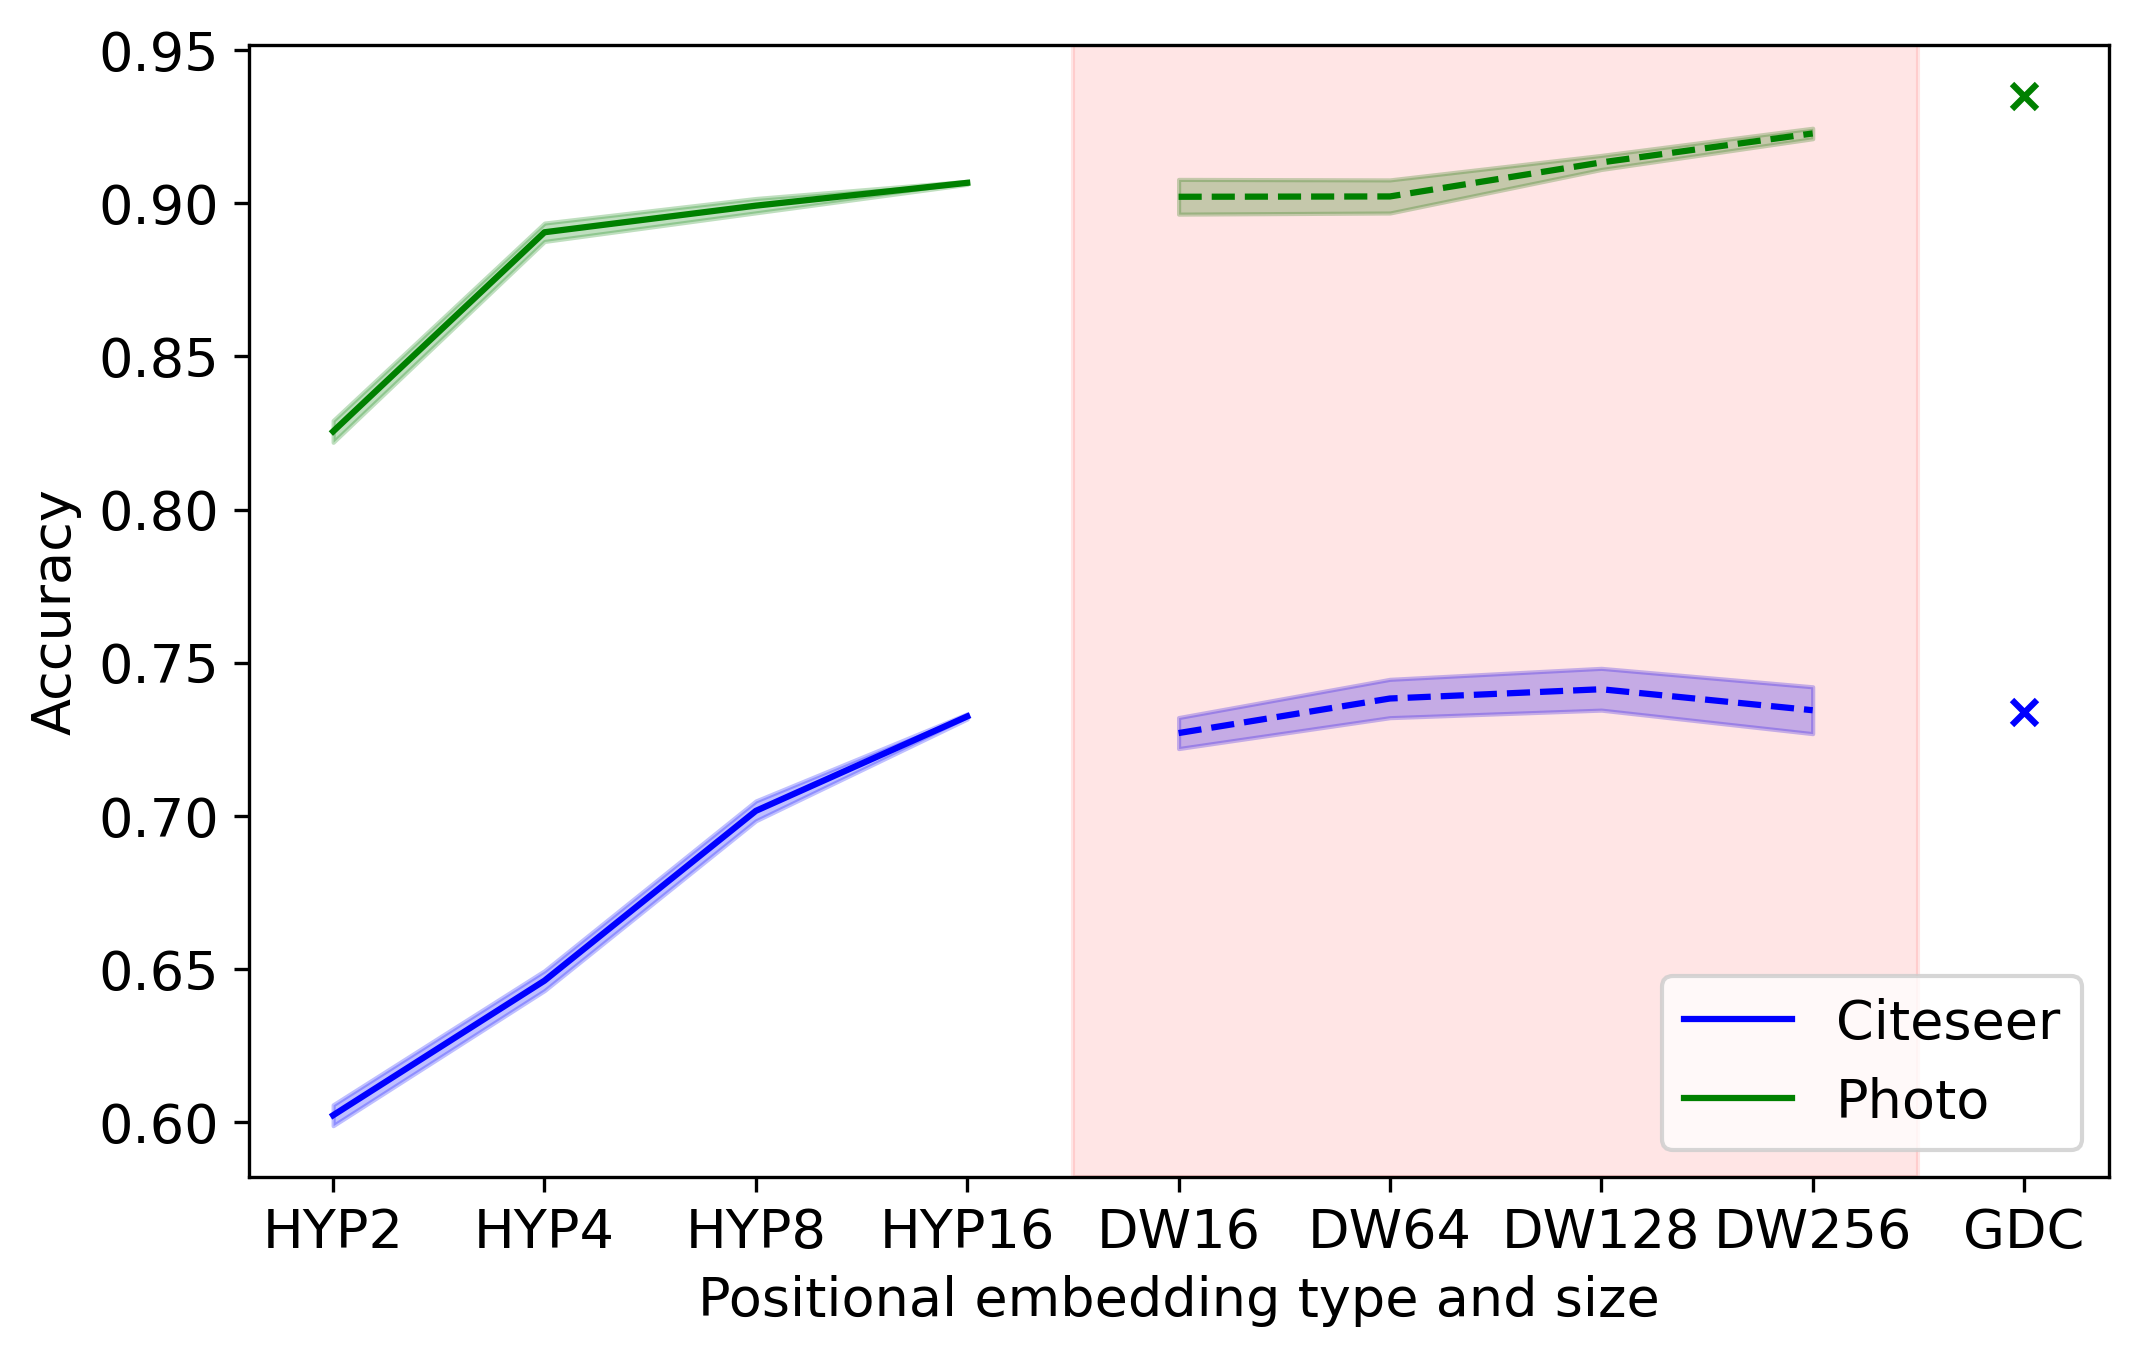

In [205]:
plt.figure(figsize=(8,5), dpi= 300)
plt.rcParams.update({'font.size': 13})

colors = ['b', 'g']

x = [1,2,3,4]
for i, ds in enumerate(['citeseer', 'photo']):
    y = np.array(results[ds]['HYP']['means'])
    std = np.array(results[ds]['HYP']['stds'])
    plt.fill_between(x, y - std/math.sqrt(8), y + std/math.sqrt(8), color=colors[i], alpha=0.25)
    plt.plot(x, y, color=colors[i], linestyle='-')


x = [5,6,7,8]
for i, ds in enumerate(['citeseer', 'photo']):
    ticks = np.array(results[ds]['DW']['sizes'])
    y = np.array(results[ds]['DW']['means'])
    std = np.array(results[ds]['DW']['stds'])
    plt.fill_between(x, y - std/math.sqrt(8), y + std/math.sqrt(8), color=colors[i], alpha=0.25)
    plt.plot(x, y, color=colors[i], linestyle='--')

plt.axvspan(4.5, 8.5, color='r', alpha=0.1)

plt.scatter(9, 0.734, color='b', marker='x')
plt.scatter(9, 0.935, color='g', marker='x')

x = list(range(1,10))
ticks = np.concatenate([results['citeseer']['HYP']['sizes'], results['citeseer']['DW']['sizes'], ['GDC']])
plt.xticks(x,ticks)
    
plt.xlabel('Positional embedding type and size')
plt.ylabel('Accuracy')
plt.legend(['Citeseer', 'Photo'], loc = 'lower right')

# plt.savefig('pos_emb_dim.pdf')

In [ ]:
# ax.set_xticklabels(datas, fontsize=22)
# # ax.set_yticklabels(fontsize=20)
# ax.tick_params(axis='y', labelsize=22)
# ax.set_xlabel('Dataset', labelpad=15, fontsize=22)
# ax.set_ylabel('Accuracy', labelpad=15, fontsize=22)
# ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
#           size=22)